In [1]:
# Importando bibliotecas
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [19]:
# Inicializando dataset e visualizando itens
df = pd.read_csv('credit_card_fraud_detection.csv')
df.head()

,Transaction ID,User ID,Transaction Amount,Transaction Date,Merchant Name,Merchant Category,Country,Card Type,Fraudulent,Transaction Method,User Age,User Gender,Account Balance,Transaction Time,Transaction Location
0,T00001,U0001,21.62,2022-10-19,Walmart,Health & Wellness,USA,Credit,No,Online,71,Non-Binary,25786.02,08:27,Rural
1,T00002,U0002,76.66,2023-03-10,Apple Store,Health & Wellness,India,Prepaid,No,Online,80,Non-Binary,25347.05,17:58,Suburban
2,T00003,U0003,494.52,2023-01-14,Best Buy,Retail,Germany,Credit,No,In-Store,48,Male,38215.24,09:28,Rural
3,T00004,U0004,300.03,2023-11-04,Apple Store,Travel,Australia,Credit,Yes,ATM Withdrawal,70,Male,34663.70,09:00,Urban
4,T00005,U0005,746.05,2023-05-12,Starbucks,Electronics,South Africa,Debit,No,Online,30,Male,8763.38,03:24,Suburban


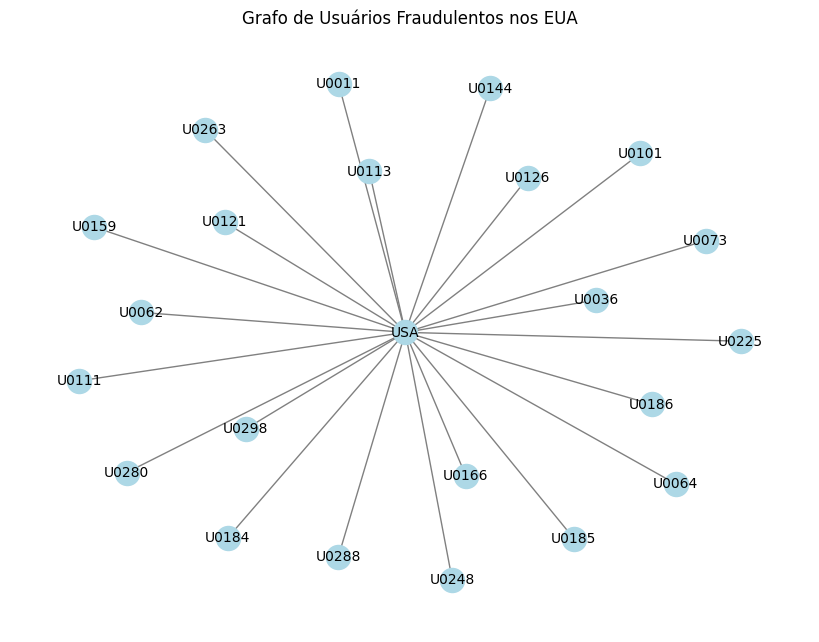

In [20]:
df_fraudulento = df[df['Fraudulent'] == 'Yes']  # Filtra apenas fraudes

grafo_fraudulento = nx.Graph()
grafo_fraudulento.add_node('USA')  # Adiciona o país como nó central

for i in range(len(df_fraudulento)):
    if df_fraudulento.iloc[i]['Country'] == 'USA':  # Verifica se o país é 'USA'
        user_id = df_fraudulento.iloc[i]['User ID']
        grafo_fraudulento.add_node(user_id)  # Adiciona o usuário como nó
        grafo_fraudulento.add_edge(user_id, "USA")  # Conecta o usuário ao país

# Plotando o grafo
plt.figure(figsize=(8, 6))
nx.draw(grafo_fraudulento, with_labels=True, node_color="lightblue", edge_color="gray", font_size=10)
plt.title("Grafo de Usuários Fraudulentos nos EUA")
plt.show()